# Interpreting ResNet Model With Gradient SHAP

This notebook loads the pretrained ResNet model given by [PaddlePaddle Models](https://github.com/PaddlePaddle/models/tree/release/1.7) and performs image classification on selected images. 

Interpretations of the predictions are generated and visualized using Gradient SHAP algorithm, specifically the `GradShapCVInterpreter` class.

If you have't done so, please first download the pretrained ResNet50 model from [this link](http://paddle-imagenet-models-name.bj.bcebos.com/ResNet50_pretrained.tar). More pretrained models can be found [here](https://github.com/PaddlePaddle/models/tree/release/1.7/PaddleCV/image_classification).

In [2]:
import paddle.fluid as fluid
import paddle
import numpy as np
import sys
from PIL import Image

sys.path.append('..')
import interpretdl as it
from interpretdl.data_processor.readers import preprocess_image, read_image
from interpretdl.data_processor.visualizer import visualize_overlay, visualize_grayscale
from assets.resnet import ResNet50

Define the `paddle_model` function that takes in images and return prediction probabilities. `ResNet50` is borrowed from PaddlePaddle image  classification [models](https://github.com/PaddlePaddle/models/tree/release/1.7/PaddleCV/image_classification/models).

In [3]:
def paddle_model(data):
    class_num = 1000
    model = ResNet50()
    logits = model.net(input=data, class_dim=class_num)
    probs = fluid.layers.softmax(logits, axis=-1)
    return probs

Initialize the `GradShapCVInterpreter`. 

In [5]:
MODEL_PATH = "../../ResNet50_pretrained"

gs = it.GradShapCVInterpreter(paddle_model, MODEL_PATH, True)

Before interpreting the image, we first take a look at the original image.

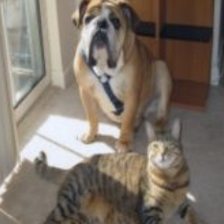

In [6]:
img_path = 'assets/catdog.png'
x = Image.fromarray(read_image(img_path)[0])
x

Then, let Gradient SHAP method help us `interpret` the image with respect to the predicted label. We choose to choose the default baselines which are all zeros. Gradients are visualize in grayscale.

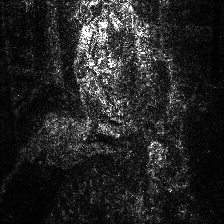

In [8]:
gradients = gs.interpret(
        img_path,
        labels=None,
        noise_amount=0.1,
        n_samples=20,
        visual=True,
        save_path=None)

Another choice for visualization is to overlay the gradients with the original image.

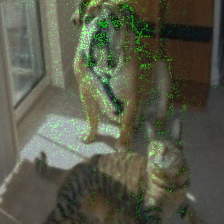

In [9]:
visualize_overlay(gradients[0], read_image(img_path)[0])

Note that `GradShapCVInterpreter` also supports multiple images as inputs. They can be either processed images or a list of image filepaths. Feel free to play around with it!